## Repaso bibliotecas Numpy, Pandas, Matplotlib y Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2><font color="blue">Ejercicio 1</font></h2>

Cree una distribución uniforme y una distribución gaussiana univariadas y grafíquelas usando histogramas.

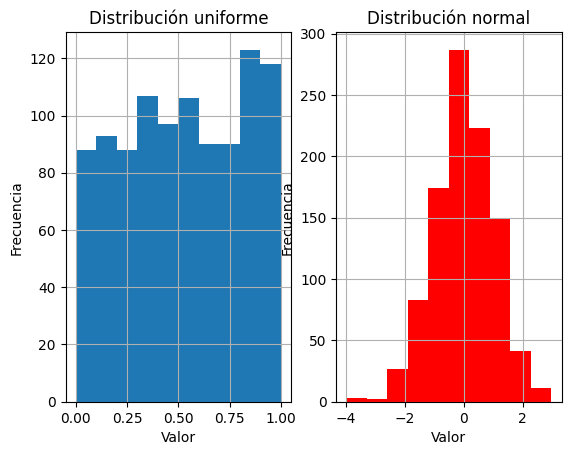

In [2]:
# Distribución uniforme
uniforme = np.random.uniform(0,1,1000)
plt.subplot(1,2,1)
plt.hist(uniforme, bins=10)
plt.title("Distribución uniforme")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.grid(True)

# Distribución normal
normal = np.random.normal(0,1,1000)
plt.subplot(1,2,2)
plt.hist(normal, bins=10, color='r')
plt.title("Distribución normal")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.grid(True)

plt.show()

<h2><font color="blue">Ejercicio 2</font></h2>

Cargue los datos del archivo "datos.csv" de la carpeta `data`, analice los valores de la columna dataset para separar los datos en 4 grupos y grafíquelos usando scatterplot y subplots.

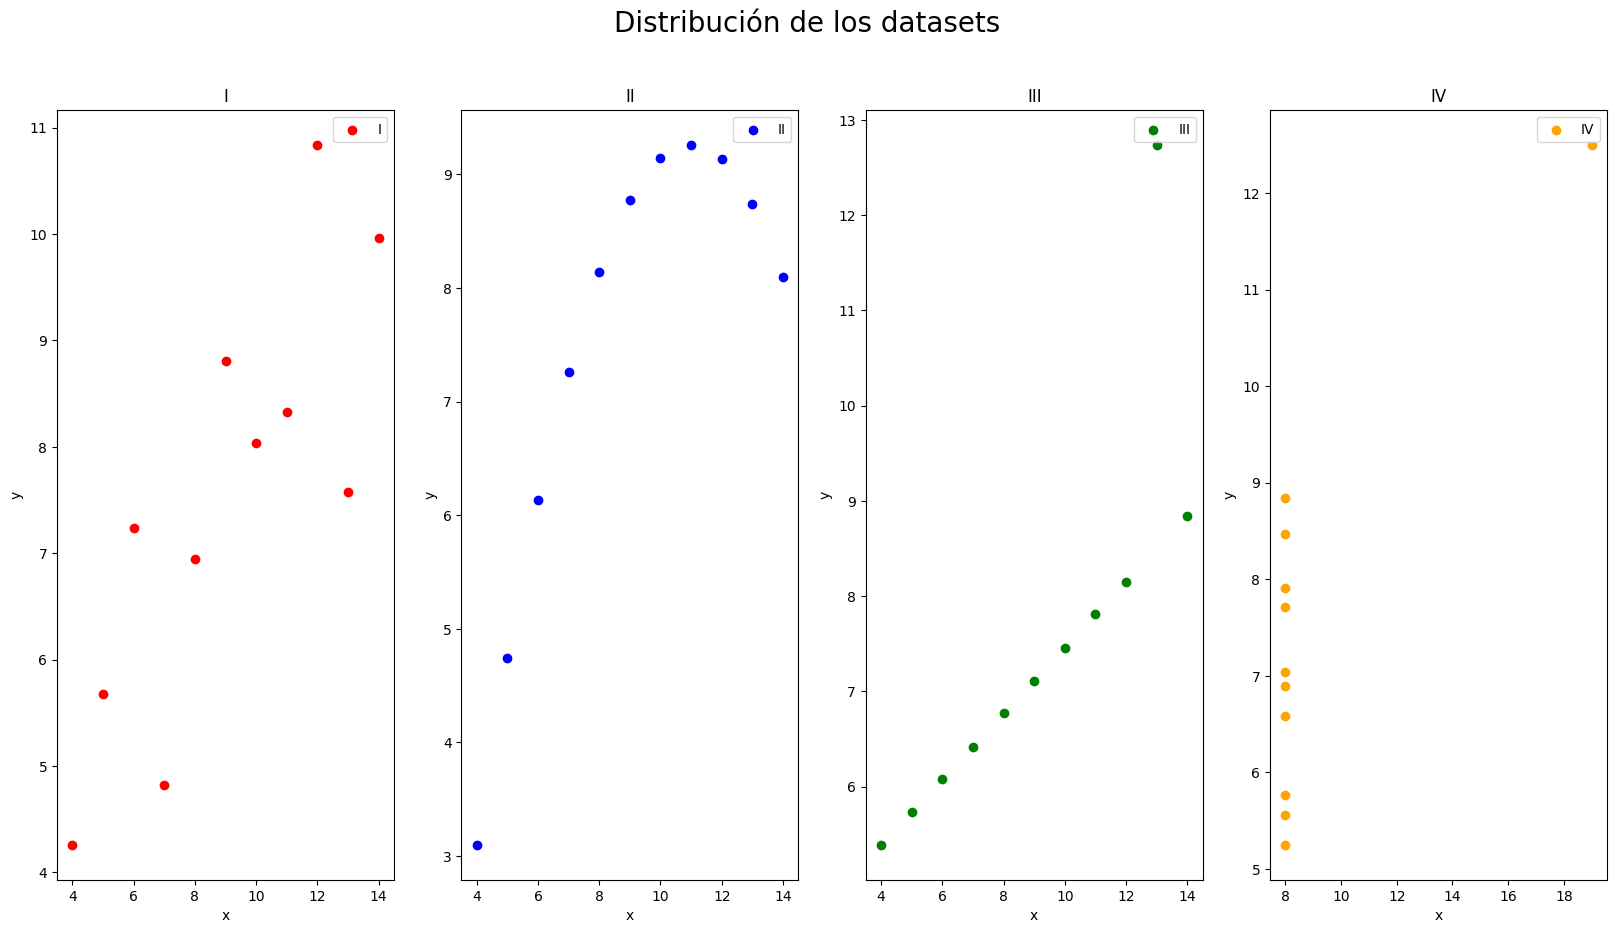

In [3]:
data = pd.read_csv('./data/datos.csv', sep=',')
data.head()

# Encontramos los valores de la columna dataset
grupos = {}
for grupo in data['dataset'].unique():
    grupos[grupo] = data[data['dataset'] == grupo]

# Plot de cada uno de los datasets
fig, axes = plt.subplots(1, len(grupos), figsize=(20, 10))
fig.suptitle('Distribución de los datasets', fontsize=20)
colors = ['red', 'blue', 'green', 'orange']
for i, grupo in enumerate(grupos):
    axes[i].set_title(grupo)
    axes[i].scatter(grupos[grupo]['x'], grupos[grupo]['y'], label=grupo, c = colors[i])
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].legend()

plt.show()



<h2><font color="blue">Ejercicio 3</font></h2>

Escriba el código para generar dos matrices $\mathbf{M_1}$ y $\mathbf{M_2}$, de tamaño $[N\times M]$. Luego, reemplace los valores de $\mathbf{M_1}$ que sean mayores a los correspondientes de $\mathbf{M_2}$ (es decir, para cada posición de la matriz) por el valor $0$. Concatene este resultado a $\mathbf{M_2}$ para obtener una matriz $[2N\times M]$. Verifique el funcionamiento del código con algunos ejemplos, mostrando por pantalla la matriz resultante y su dimensión.
    
Ejemplo: si $\mathbf{M_1}=\begin{bmatrix}1 & 5 & 5\\ 5 & 8 & 7\end{bmatrix}$ y $\mathbf{M_2}=\begin{bmatrix}1 & 2 & 4\\ 5 & 6 & 7\end{bmatrix}$, la salida deberá ser $\mathbf{R}=\begin{bmatrix}1 & 0 & 0\\ 5 & 0 & 7\\1 & 2 & 4\\ 5 & 6 & 7\end{bmatrix}$  

In [4]:
N = 2
M = 3

m1 = np.random.randint(0, 10, size=(N, M))
m2 = np.random.randint(0, 10, size=(N, M))

m1[m1 > m2] = 0

res = np.concatenate((m1, m2), axis=0)
print(res)


[[0 0 0]
 [0 0 0]
 [6 4 3]
 [3 4 2]]


<h2><font color="blue">Ejercicio 4</font></h2>

Cargue los datos contenidos en el archivo "data_corrupted.csv" a un dataframe. Como el nombre lo indica, algunos datos pueden estar corruptos. Renombre las columnas del dataframe para que tengan los nombres "col1" y "col2". Encuentre el valor medio y desvío estándar de cada columna. Corrobore los resultados usando el método `describe`.

In [5]:
# El archivo no contiene header, por lo que se debe agregar el parámetro header=None
data_corrupted = pd.read_csv('./data/data_corrupted.csv', header=None)

data_corrupted.columns = ['col1', 'col2']

data_corrupted.head()

data_corrupted_not_nan = data_corrupted.dropna()

mean = data_corrupted_not_nan.mean()
std = data_corrupted_not_nan.std()

print(mean, '\n', std)
data_corrupted_not_nan.describe()

col1    0.601249
col2    0.600866
dtype: float64 
 col1    0.362309
col2    0.301768
dtype: float64


,col1,col2
count,6.000000,6.000000
mean,0.601249,0.600866
std,0.362309,0.301768
min,0.197682,0.130571
25%,0.278116,0.426870
50%,0.621564,0.680562
75%,0.909436,0.820996
max,0.997657,0.903386


<h2><font color="blue">Ejercicio 5</font></h2>

Los archivos **iris-setosa.csv**, **iris-versicolor.csv** e **iris-virginica.csv** contienen la información del conjunto de datos <font face="Courier" size=3><b>iris</b></font> separados por clases (ver descripción en el archivo **iris.rst**).
    
1. Construya el conjunto de datos iris a partir de estos tres archivos.
Luego, reemplace en la columna <font face="Courier" size=3><b>class</b></font> los valores numéricos por el nombre correspondiente a la clase. Guarde el conjunto de datos en un único archivo CSV "iris.csv", incorporando estas modificaciones.


In [6]:
setosa = pd.read_csv('./data/iris-setosa.csv')
versicolor = pd.read_csv('./data/iris-versicolor.csv')
virginica = pd.read_csv('./data/iris-virginica.csv')

setosa['class'] = 'setosa'
versicolor['class'] = 'versicolor'
virginica['class'] = 'virginica'

iris = pd.concat([setosa, versicolor, virginica], axis=0)
iris.to_csv('./data/iris.csv', index=False)


2. Obtenga la media y desvio de cada atributo y compárelos con las mostradas en el archivo **iris.rst**, cree un dataframe de 2 columnas con estos datos

In [7]:
iris_dict = {'Media': iris.mean(numeric_only=True),
             'Desvio': iris.std(numeric_only=True)}

iris_df_describe = pd.DataFrame(iris_dict)
iris_df_describe

,Media,Desvio
sepal_length,5.843333,0.828066
sepal_width,3.057333,0.435866
petal_length,3.758000,1.765298
petal_width,1.199333,0.762238


<h2><font color="blue">Ejercicio 6</font></h2>

Grafique la siguiente recta junto con el texto como se muestra en la figura y muestre por consola su pendiente.


<img src="https://drive.google.com/uc?export=view&id=1HLm6NpD4lenot5LR2BXI4SUDJbjCrZXR" width = 450>

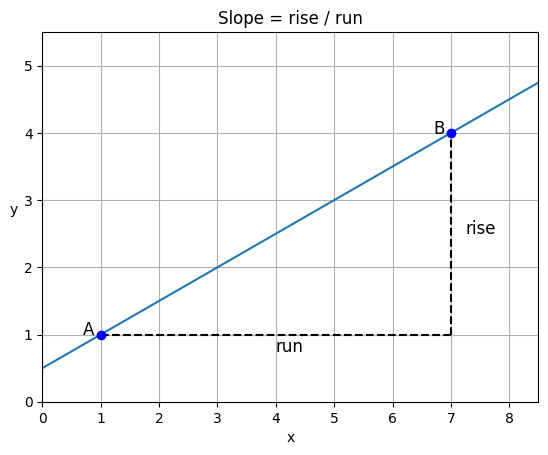

La pendiente de la recta es 0.5


In [8]:
A = pd.array([1,1])
B = pd.array([7,4])

m = (B[1]-A[1])/(B[0]-A[0])

x = np.linspace(0,10,10)
y = m*(x-A[0])+A[1]

# Gráfica de la recta
plt.plot(x, y)
# Gráficas de las lineas de puntos
plt.plot([B[0], B[0]], [A[0], B[1]], color = 'black', linestyle = '--')
plt.plot([A[0], B[0]], [A[1], A[1]], color = 'black', linestyle = '--')
# Gráficas de los puntos
plt.plot(A[0], A[1], 'bo', B[0], B[1], 'bo')
# Puntos
plt.text(A[0]-0.3, A[1]-0.01, 'A', fontsize=12)
plt.text(B[0]-0.3, B[1]-0.01, 'B', fontsize=12)
# Texto
plt.text(7.25, 2.5, 'rise', fontsize=12)
plt.text(4, 0.75, 'run', fontsize=12)
plt.grid(True)
plt.axis([0, 8.5, 0, 5.5])
plt.xlabel('x')
plt.ylabel('y', ha='right', rotation=0)
plt.title('Slope = rise / run')

plt.show()
print(f'La pendiente de la recta es {m}')


<h2><font color="blue">Ejercicio 7</font></h2>


Cargue el conjunto de datos del archivo <b>iris.csv</b> que creó y grafique en tres histogramas la distribución de los anchos de sépalos (`sepal_width`) para cada especie de flor. Además, haga una cuarta  gráfica con los tres histogramas solapados.


<b>Figura de referencia:</b>

<div style="width:680px;margin-left: auto;margin-right: auto;">
  <img src="https://drive.google.com/uc?id=1mT_PNPqugXDyJSkNoIb1O3FxR_NzY9j7">
</div>

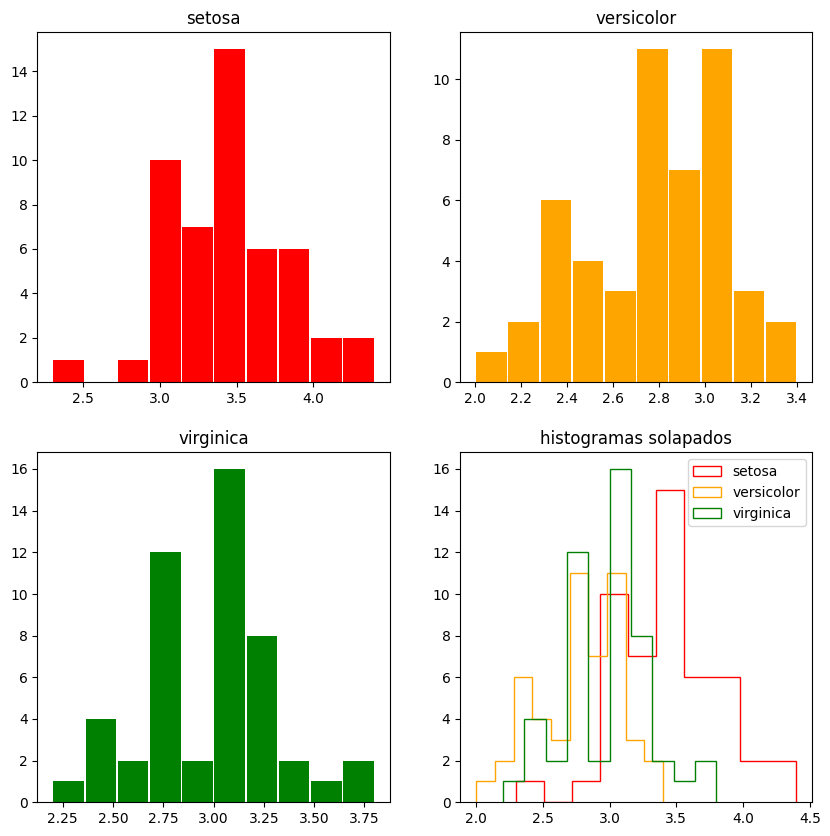

In [9]:
iris = pd.read_csv('./data/iris.csv')

iris.head()

dfs = {}
for tipo in iris['class'].unique():
    dfs[tipo] = iris[iris['class'] == tipo]

# subplots de histogramas para cada sepal width
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
colors = ['red', 'orange', 'green']
for i, tipo in enumerate(dfs):
    ax = axes[i//2, i%2]
    ax.hist(dfs[tipo]['sepal_width'], bins=10, rwidth=0.95, color = colors[i])
    ax.set_title(tipo)

# Histogramas superpuestos de todos juntos
for i, tipo in enumerate(dfs):
    axes[1, 1].hist(dfs[tipo]['sepal_width'], bins=10, color = colors[i], histtype='step', label=tipo)
    axes[1, 1].set_title('histogramas solapados')

plt.legend()

<h2><font color="blue">Ejercicio 8</font></h2>
    
Cargue en un `DataFrame` el conjunto de datos sobre películas dado en **imdb_1000.csv**. A partir de procesar estos datos responda a los siguientes enunciados.



In [10]:
pelis = pd.read_csv('./data/imdb_1000.csv')
pelis.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."



    
**1.** Calcule la duración media de las películas


In [11]:
# Duración media de las peliculas = mean(duration)
duracion_media = pelis['duration'].mean()
duracion_media

120.97957099080695

**2.** Encuentre las 5 películas más cortas y las 3 más largas. Muestre como resultado título y duración de cada lista.


In [12]:
cortas_index = pelis['duration'].nsmallest(5)
largas_index = pelis['duration'].nlargest(3)
cortas = {}
for i in cortas_index.index:
    cortas[pelis.loc[i]['title']] = pelis.loc[i]['duration']

largas = {}
for i in largas_index.index:
    largas[pelis.loc[i]['title']] = pelis.loc[i]['duration']

cortas, largas

({'Freaks': 64,
  'Battleship Potemkin': 66,
  'The Cabinet of Dr. Caligari': 67,
  'The Kid': 68,
  'Duck Soup': 68},
 {'Hamlet': 242,
  'Gone with the Wind': 238,
  'Once Upon a Time in America': 229})


**3.** Grafique con boxplots la duración de las películas, separándolas por género.



<Axes: xlabel='genre', ylabel='duration'>

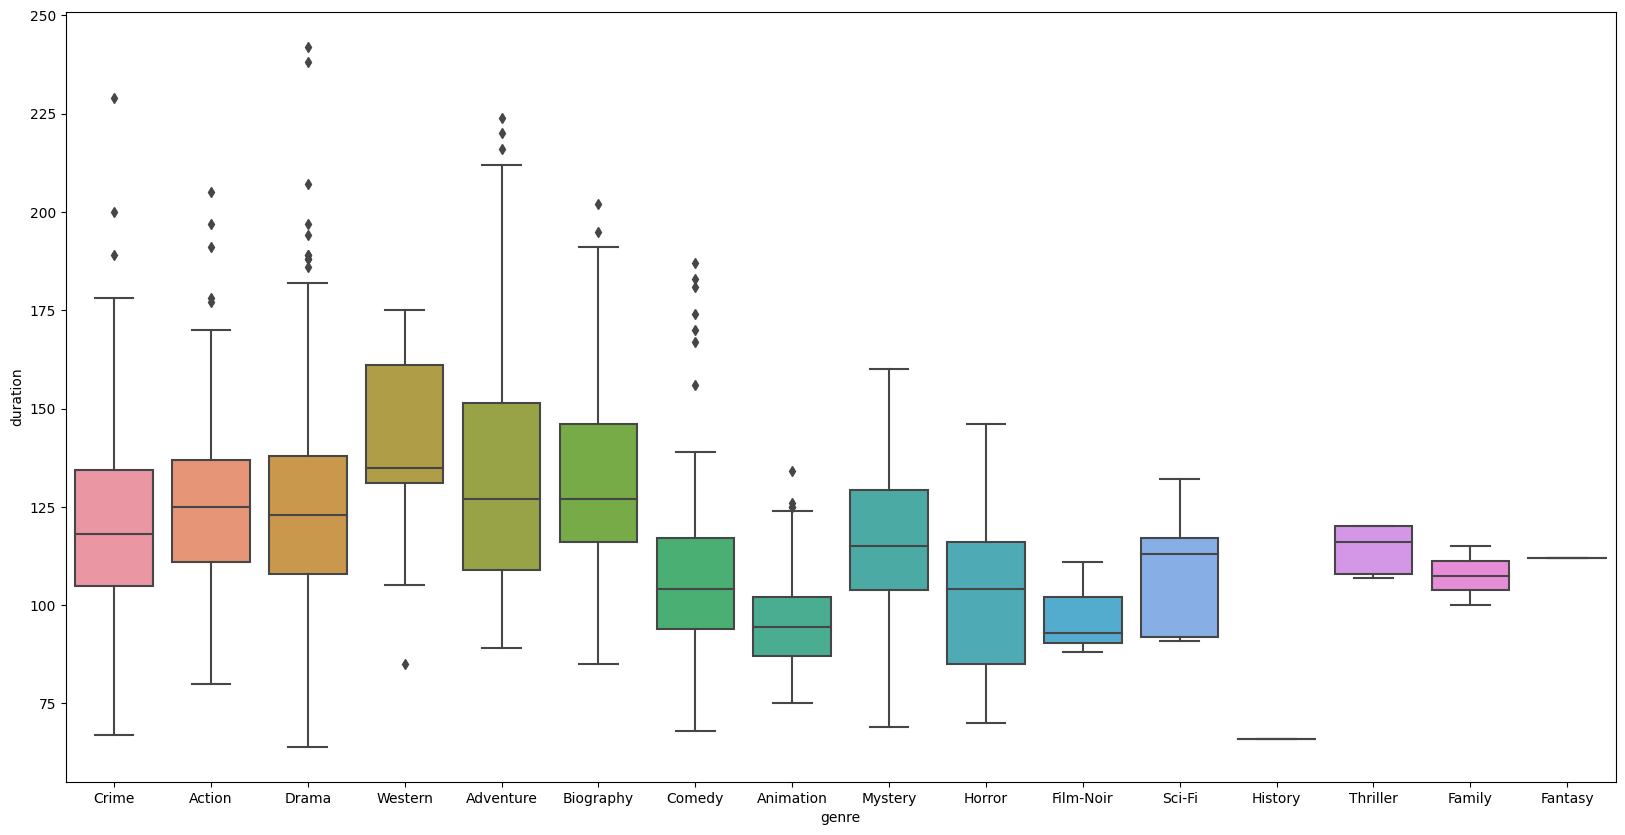

In [13]:
fig, axes = plt.subplots(figsize=(20, 10))
# Boxplot por cada genero dada su duracion
sns.boxplot(data=pelis, x='genre', y='duration', ax=axes)
    

**4.** Grafique con barras la cantidad de películas, separándolas por clasificación de contenido.



<Axes: title={'center': 'Gráfico de barras para la clasificación de contenido'}, xlabel='Cantidad', ylabel='Clasificación'>

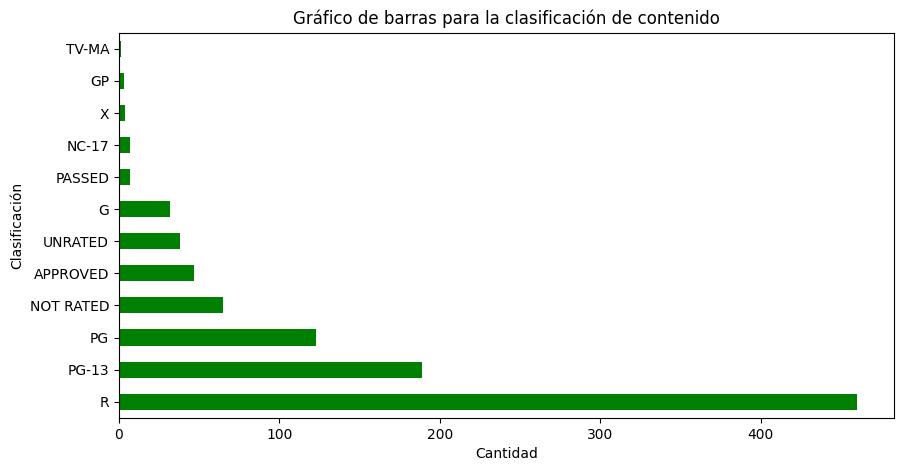

In [19]:
# Gráfico de barras por clasificación de contenido
pelis['content_rating'].value_counts().plot(kind='barh', figsize=(10,5), color='green', xlabel='Cantidad', ylabel='Clasificación', title='Gráfico de barras para la clasificación de contenido')

**5.** Encuentre la película con mayor puntaje para cada género y muestre en un `DataFrame` el resultado. Indique género, título y puntaje.

In [30]:
genres = pelis['genre'].unique()

peli_mayor_puntaje = []
for genre in genres:
    pelis_genre = pelis[pelis['genre'] == genre]
    peli_mayor_puntaje.append([genre, pelis_genre.loc[pelis_genre['star_rating'].idxmax(), 'title'], pelis_genre['star_rating'].max()])

pelis_max_df = pd.DataFrame(peli_mayor_puntaje, columns=['género', 'título', 'puntaje'])

pelis_max_df

,género,título,puntaje
0,Crime,The Shawshank Redemption,9.3
1,Action,The Dark Knight,9.0
2,Drama,12 Angry Men,8.9
3,Western,"The Good, the Bad and the Ugly",8.9
4,Adventure,The Lord of the Rings: The Return of the King,8.9
5,Biography,Schindler's List,8.9
6,Comedy,Life Is Beautiful,8.6
7,Animation,Spirited Away,8.6
8,Mystery,Rear Window,8.6
9,Horror,Psycho,8.6
